In [1]:
import pyximport

pyximport.install()
import matplotlib.pyplot as plt
import numpy as np
import astropy.units as u
import gammapy
from matplotlib import patches

# from gammapy.datasets import MapDataset
from gammapy.maps import Map
from astropy.coordinates import SkyCoord, Angle
from gammapy.modeling import Fit, Parameter, Parameters, Covariance
from gammapy.datasets import MapDataset #, MapDatasetNuisance
from gammapy.modeling.models import (
    PowerLawSpectralModel,
    create_crab_spectral_model,
    SkyModel,
    PointSpatialModel,
    ShellSpatialModel,
    GeneralizedGaussianSpatialModel,
    TemplateSpatialModel,
    LogParabolaSpectralModel,
    GaussianSpatialModel,
    DiskSpatialModel,
    PowerLawNormSpectralModel,
    Models,
    SpatialModel,
    FoVBackgroundModel,
)
from regions import CircleSkyRegion

import sys

sys.path.append(
    "/home/hpc/caph/mppi045h/3D_analysis/N_parameters_in_L/syserror_3d_bkgmodel/4-Fitting_nuisance_and_model_parameters"
)
from my_dataset_maps_19 import MapDatasetNuisance
from  my_fit_19 import Fit

In [2]:
main_path = '/home/vault/caph/mppi062h/repositories/GC_science'

hess = MapDataset.read(f'20220511_dataset002_hess1_muonflagTrue.fits')
hess2 = MapDataset.read(f'20220511_dataset002_hess2_muonflagTrue.fits')
hess.stack(hess2)

dataset_standard = hess
dataset_standard = dataset_standard.cutout(
    position=dataset_standard.geoms["geom"].center_skydir, width=6 * u.deg
)

In [3]:
from gammapy.catalog import SourceCatalogHGPS, SourceCatalogGammaCat, SourceCatalog4FGL
from gammapy.modeling.models import ExpCutoffPowerLawSpectralModel, GaussianSpatialModel, ShellSpatialModel

HGPS, FGL4 = SourceCatalogHGPS(), SourceCatalog4FGL() 
catalog = HGPS
mask1 = np.abs(catalog.table['GLAT']) < 2.6
mask2 = (catalog.table['GLON'] < 2.6) + (catalog.table['GLON'] > 357.4)
mask = mask1 & mask2
HGPS_models = catalog[mask].to_models()

wun_map = '/home/saturn/caph/mppi043h/diffusiontemplate/imp_pcut_v3.fits'
diff_map = Map.read(wun_map)
if wun_map == '/home/saturn/caph/mppi043h/diffusiontemplate/imp_v2.fits':
    diff_map.geom.axes['energy'].name = 'energy_true'
diff_name = f'diffuse_model.fits'
diff_map.write(diff_name, overwrite=True)
diff= SkyModel(spectral_model=PowerLawNormSpectralModel(),
               spatial_model=TemplateSpatialModel(diff_map, normalize=False, filename=diff_name),
               name='diff-emission')
#diff.parameters["tilt"].frozen = False

# assining the models to the dataset 
initial_model_hess = HGPS_models
initial_model_hess.append(diff)
initial_model_hess['HESS J1745-290'].spatial_model=GaussianSpatialModel(lon_0=359.945*u.deg, lat_0=-0.044*u.deg, sigma=0.07*u.deg, frame='galactic')

# these sources are within the mask fit and therefore does not need to be fitted
frozen_sources= ['HESS J1746-308','HESS J1745-303']
for s in frozen_sources:
    initial_model_hess[s].parameters.freeze_all()

bkg_model = FoVBackgroundModel(dataset_name=dataset_standard.name)
bkg_model.parameters["tilt"].frozen = False
initial_model_hess.append(bkg_model)
dataset_standard.models = initial_model_hess


In [4]:
fit_standarad = Fit(store_trace=False)
result_standarad = fit_standarad.run([dataset_standard])
print(result_standarad)

Position <SkyCoord (Galactic): (l, b) in deg
    (43.36875175, 0.04908089)> is outside valid IRF map range, using nearest IRF defined within
Position <SkyCoord (Galactic): (l, b) in deg
    (43.36875175, 0.04908089)> is outside valid IRF map range, using nearest IRF defined within
Position <SkyCoord (Galactic): (l, b) in deg
    (313.18489815, 0.04908089)> is outside valid IRF map range, using nearest IRF defined within
Position <SkyCoord (Galactic): (l, b) in deg
    (313.18489815, 0.04908089)> is outside valid IRF map range, using nearest IRF defined within
Position <SkyCoord (Galactic): (l, b) in deg
    (353.76763227, 0.04908089)> is outside valid IRF map range, using nearest IRF defined within
Position <SkyCoord (Galactic): (l, b) in deg
    (353.76763227, 0.04908089)> is outside valid IRF map range, using nearest IRF defined within
Position <SkyCoord (Galactic): (l, b) in deg
    (45.0369268, -0.044)> is outside valid IRF map range, using nearest IRF defined within
Position <SkyC

OptimizeResult

	backend    : minuit
	method     : migrad
	success    : False
	message    : Optimization terminated successfully.
	nfev       : 1732
	total stat : 849179.85

OptimizeResult

	backend    : minuit
	method     : migrad
	success    : False
	message    : Optimization terminated successfully.
	nfev       : 1732
	total stat : 849179.85




In [5]:
print(result_standarad)

OptimizeResult

	backend    : minuit
	method     : migrad
	success    : False
	message    : Optimization terminated successfully.
	nfev       : 1732
	total stat : 849179.85

OptimizeResult

	backend    : minuit
	method     : migrad
	success    : False
	message    : Optimization terminated successfully.
	nfev       : 1732
	total stat : 849179.85




In [6]:
print(dataset_standard.models)

DatasetModels

Component 0: SkyModel

  Name                      : HESS J1741-302
  Datasets names            : None
  Spectral model type       : PowerLawSpectralModel
  Spatial  model type       : PointSpatialModel
  Temporal model type       : 
  Parameters:
    index                   :      2.454   +/-    0.15             
    amplitude               :   1.95e-13   +/- 3.4e-14 1 / (cm2 s TeV)
    reference    (frozen)   :      1.000       TeV         
    lon_0                   :    358.263   +/-    0.01 deg         
    lat_0                   :      0.064   +/-    0.01 deg         

Component 1: SkyModel

  Name                      : HESS J1745-290
  Datasets names            : None
  Spectral model type       : ExpCutoffPowerLawSpectralModel
  Spatial  model type       : GaussianSpatialModel
  Temporal model type       : 
  Parameters:
    index                   :      2.064   +/-    0.04             
    amplitude               :   2.57e-12   +/- 7.8e-14 1 / (cm2 s TeV)
  

### the fitted nuisance

In [7]:
import yaml

name= 'test3'

# reading the MapDatasetNuisance
outputfile = 'output/Tutorial_output'
dataset_N = MapDatasetNuisance.read(f'/home/vault/caph/mppi062h/repositories/syserror_3d_bkgmodel/2-source_dataset/GC_0.19/{name}_nui_dataset.fits')
with open(f'/home/vault/caph/mppi062h/repositories/syserror_3d_bkgmodel/2-source_dataset/GC_0.19/{name}nui_model.yml', 'r') as file:
    nui_model = yaml.full_load(file)
models = Models.from_dict(nui_model)
# gets somehow read into as an int which causes problems when printing with precison
models.parameters['reference'].error = float(models.parameters['reference'].error)

print(models)

with open(f'/home/vault/caph/mppi062h/repositories/syserror_3d_bkgmodel/2-source_dataset/GC_0.19/{name}nui_bgmodel.yml', 'r') as file:
    nui_bg_model = yaml.full_load(file)

bkg_model = FoVBackgroundModel(dataset_name = dataset_N.name, )

models.append(bkg_model)
dataset_N.models =models
dataset_N.background_model.parameters['tilt'].value = nui_bg_model['spectral']['parameters'][1]['value']
dataset_N.background_model.parameters['norm'].value = nui_bg_model['spectral']['parameters'][0]['value']
dataset_N.background_model.parameters['tilt'].frozen = False
dataset_N.background_model.parameters['tilt'].error = nui_bg_model['spectral']['parameters'][1]['error']
dataset_N.background_model.parameters['norm'].error = nui_bg_model['spectral']['parameters'][0]['error']
dataset_N.background_model.parameters['reference'].error = float(0.0)

with open('nui_par.yml', ) as file:
    nui_par = yaml.full_load(file)
N_parameters = Parameters.from_dict(nui_par)
dataset_N.N_parameters =N_parameters
print("max nui par:", N_parameters.value.max())
print(dataset_N)

Models

Component 0: SkyModel

  Name                      : HESS J1741-302
  Datasets names            : None
  Spectral model type       : PowerLawSpectralModel
  Spatial  model type       : PointSpatialModel
  Temporal model type       : 
  Parameters:
    index                   :      2.376   +/-    0.19             
    amplitude               :   1.64e-13   +/- 3.5e-14 1 / (cm2 s TeV)
    reference    (frozen)   :      1.000       TeV         
    lon_0                   :    358.264   +/-    0.01 deg         
    lat_0                   :      0.065   +/-    0.01 deg         

Component 1: SkyModel

  Name                      : HESS J1745-290
  Datasets names            : None
  Spectral model type       : ExpCutoffPowerLawSpectralModel
  Spatial  model type       : GaussianSpatialModel
  Temporal model type       : 
  Parameters:
    index                   :      2.069   +/-    0.04             
    amplitude               :   2.59e-12   +/- 7.9e-14 1 / (cm2 s TeV)
    refer

In [8]:
new_dataset = dataset_standard.copy()
#new_dataset.background.data = dataset_N.npred_background().data*(1+dataset_N.N_map().data)
new_dataset.background.data = dataset_N.npred_background().data + dataset_N.background.data*dataset_N.N_map().data

In [9]:
new_dataset.models = dataset_N.models

In [10]:
new_dataset.models['diff-emission'].parameters['tilt'].value = 0

In [11]:
bins=np.linspace(-5,5,30)
from gammapy.estimators import ExcessMapEstimator
import scipy.stats as stats
corr = 0.07

def significance_map_full(hess, title):
    estimator = ExcessMapEstimator(
        correlation_radius=f"{corr} deg",
        energy_edges=[0.1, 100] * u.TeV)
    result = estimator.run(hess)
    
    ########## full FoV
    ax = result["sqrt_ts"].plot(cmap="coolwarm", add_cbar=True, vmin=-5, vmax=5);
    square=patches.Rectangle((359.25,-0.75), width=1.5, height=1.5, 
                          transform=plt.gca().get_transform("galactic"), fill=False, color='black') # now the circle size is the radius in degree
    ax.add_patch(square)
    
    
    plt.title(f'{title}\n0.1-100 TeV')
    plt.show()
    
    data=result["sqrt_ts"].data.ravel()
    plt.hist(data, bins=bins, density=True, color='lightblue',
             label=f'mean={np.nanmean(data):.3f}\nstd={np.nanstd(data):.3f}');
    plt.plot(bins, stats.norm.pdf(bins))
    plt.xlabel(r'Significance [$\sigma$]')
    plt.legend()
    plt.show()

    ########## cutout FoV
    cutout= result["sqrt_ts"].cutout(position=SkyCoord(0,0, frame='galactic', unit='deg'), width=1.5*u.deg)
    cutout.plot(cmap="coolwarm", add_cbar=True, vmin=-5, vmax=5);
    plt.show()
    data=cutout.data.ravel()
    plt.hist(data, bins=bins, density=True, color='lightblue',
             label=f'mean={np.nanmean(data):.3f}\nstd={np.nanstd(data):.3f}');
    plt.plot(bins, stats.norm.pdf(bins))
    plt.xlabel(r'Significance [$\sigma$]')
    plt.legend()
    plt.show()

In [12]:
def plot_spectrum(hess_list):
    energy_bounds=[0.1,100]*u.TeV
    sed_type = "e2dnde"

    for j, s in enumerate(initial_model_hess[:-1]):
        if s.name not in frozen_sources:
            s.spectral_model.plot(energy_bounds=energy_bounds, sed_type=sed_type, color='black', label='catalog', ls='--')
            for i, hess in enumerate(hess_list):
                hess.models[j].spectral_model.plot(energy_bounds=energy_bounds, sed_type=sed_type, label=hess_list_label[i], color=color_counts[i])
                hess.models[j].spectral_model.plot_error(energy_bounds=energy_bounds, sed_type=sed_type, color='lightgray')
            plt.title(s.name)
            if s.name=='HESS J1745-290':
                plt.ylim(1e-14, 1e-11)
            plt.legend()
            plt.show()

In [13]:
def significance_map_energybands(hess, title):
    estimator = ExcessMapEstimator(
    correlation_radius=f"{corr} deg",
    energy_edges=[0.1,0.5, 1, 5, 100] * u.TeV)
    result = estimator.run(hess)
    
    cutout= result["sqrt_ts"].cutout(position=SkyCoord(0,0, frame='galactic', unit='deg'), width=1.5*u.deg)
    ax = cutout.plot_grid(figsize=(18, 3), cmap="coolwarm", add_cbar=True, vmin=-5, vmax=5, ncols=4);
    plt.show()
    
    fig, ax = plt.subplots(1,4, figsize=(18, 3))
    for i in range(4):
        data=cutout.data[i].ravel()
        ax[i].hist(data, bins=bins, density=True, color='lightblue', label=f'mean={np.nanmean(data):.3f}\nstd={np.nanstd(data):.3f}');
        ax[i].plot(bins, stats.norm.pdf(bins), color='C1')
        ax[i].set_xlabel(r'Significance [$\sigma$]')
        ax[i].legend()
    plt.show()

In [14]:
hess_list = [dataset_standard, new_dataset]
hess_list_label = ['standard', 'with nui']

color_counts = ['navy', 'C0']
color_bkg= ['sienna', 'C1']
color_res= ['darkred', 'indianred']

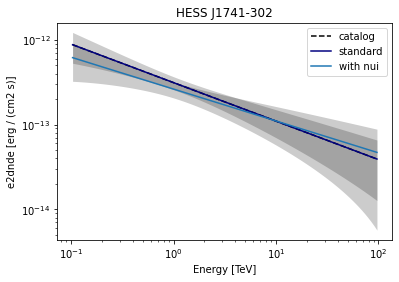

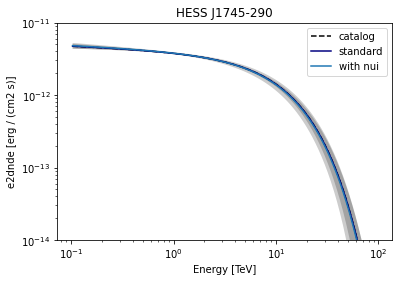

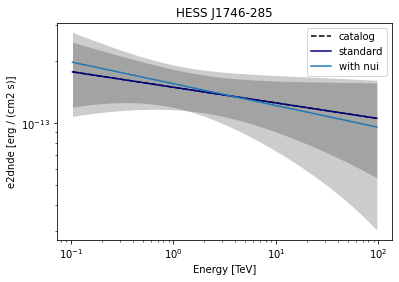

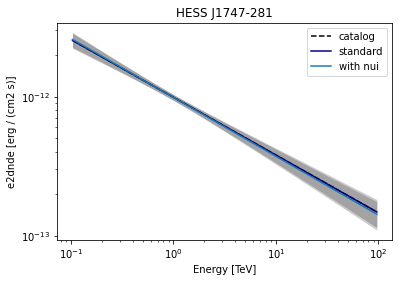

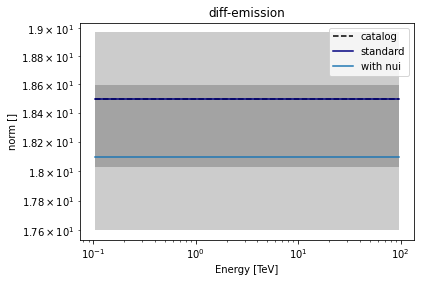

/home/woody/caph/mppi062h/software/anaconda/anaconda3/envs/gammapy-0.19/lib/python3.9/site-packages/astropy/visualization/wcsaxes/core.py:211: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  return super().imshow(X, *args, origin=origin, **kwargs)


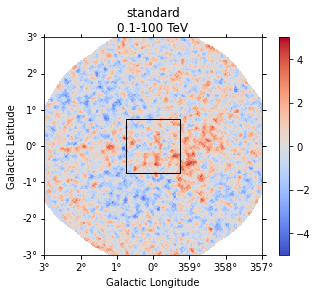

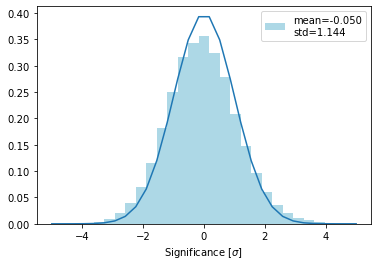

/home/woody/caph/mppi062h/software/anaconda/anaconda3/envs/gammapy-0.19/lib/python3.9/site-packages/astropy/visualization/wcsaxes/core.py:211: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  return super().imshow(X, *args, origin=origin, **kwargs)


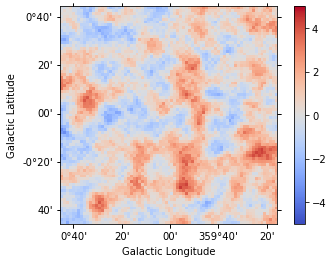

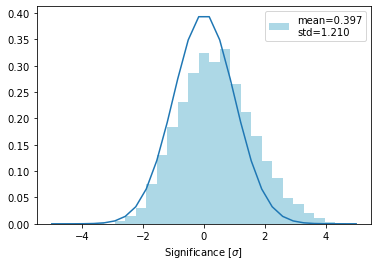

/home/woody/caph/mppi062h/software/anaconda/anaconda3/envs/gammapy-0.19/lib/python3.9/site-packages/astropy/visualization/wcsaxes/core.py:211: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  return super().imshow(X, *args, origin=origin, **kwargs)


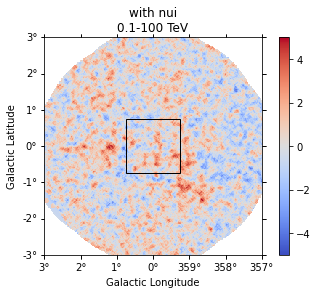

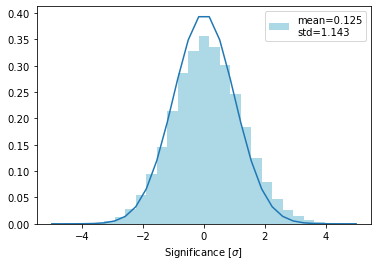

/home/woody/caph/mppi062h/software/anaconda/anaconda3/envs/gammapy-0.19/lib/python3.9/site-packages/astropy/visualization/wcsaxes/core.py:211: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  return super().imshow(X, *args, origin=origin, **kwargs)


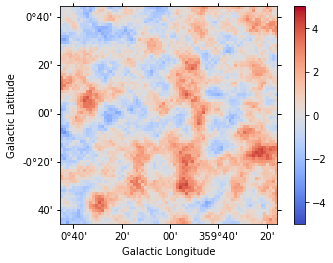

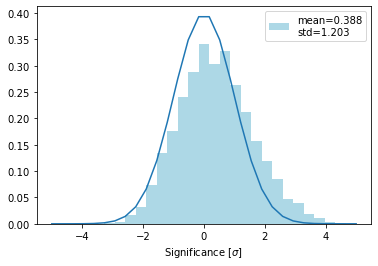

/home/woody/caph/mppi062h/software/anaconda/anaconda3/envs/gammapy-0.19/lib/python3.9/site-packages/astropy/visualization/wcsaxes/core.py:211: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  return super().imshow(X, *args, origin=origin, **kwargs)


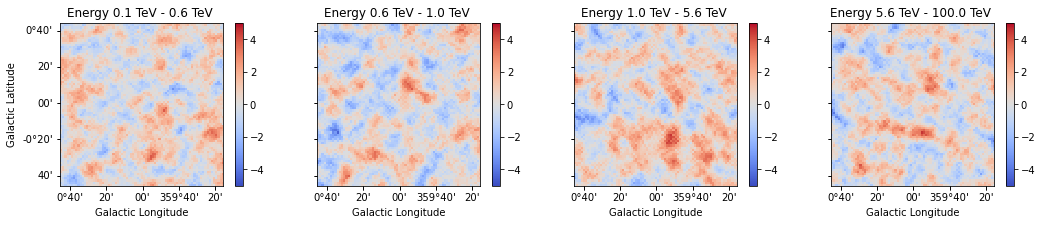

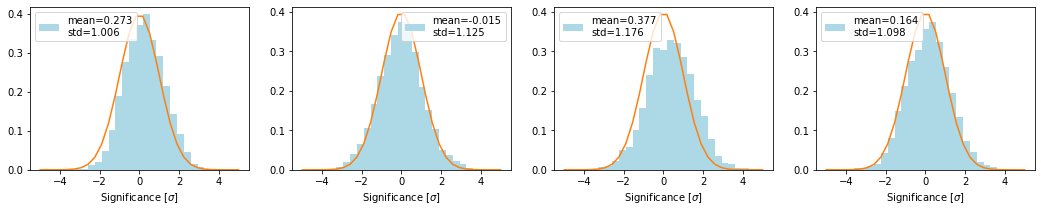

/home/woody/caph/mppi062h/software/anaconda/anaconda3/envs/gammapy-0.19/lib/python3.9/site-packages/astropy/visualization/wcsaxes/core.py:211: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  return super().imshow(X, *args, origin=origin, **kwargs)


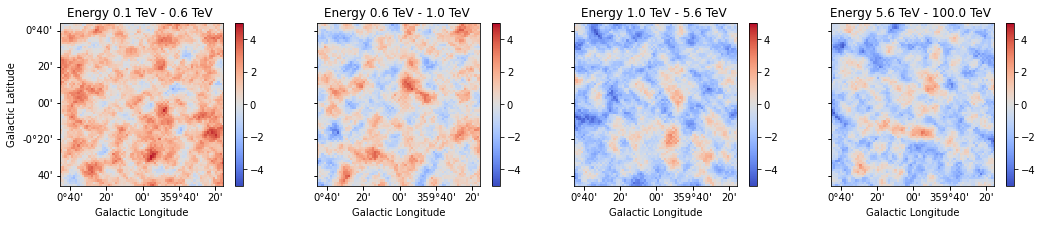

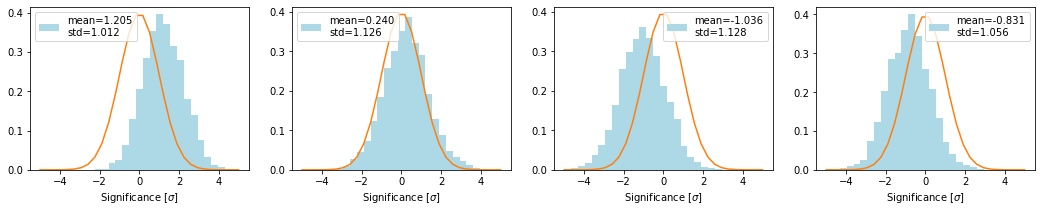

In [15]:
plot_spectrum(hess_list)
for i, hess in enumerate(hess_list):
    significance_map_full(hess, hess_list_label[i])
for i, hess in enumerate(hess_list):
    significance_map_energybands(hess, hess_list_label[i])

/home/woody/caph/mppi062h/software/anaconda/anaconda3/envs/gammapy-0.19/lib/python3.9/site-packages/astropy/visualization/wcsaxes/core.py:211: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  return super().imshow(X, *args, origin=origin, **kwargs)


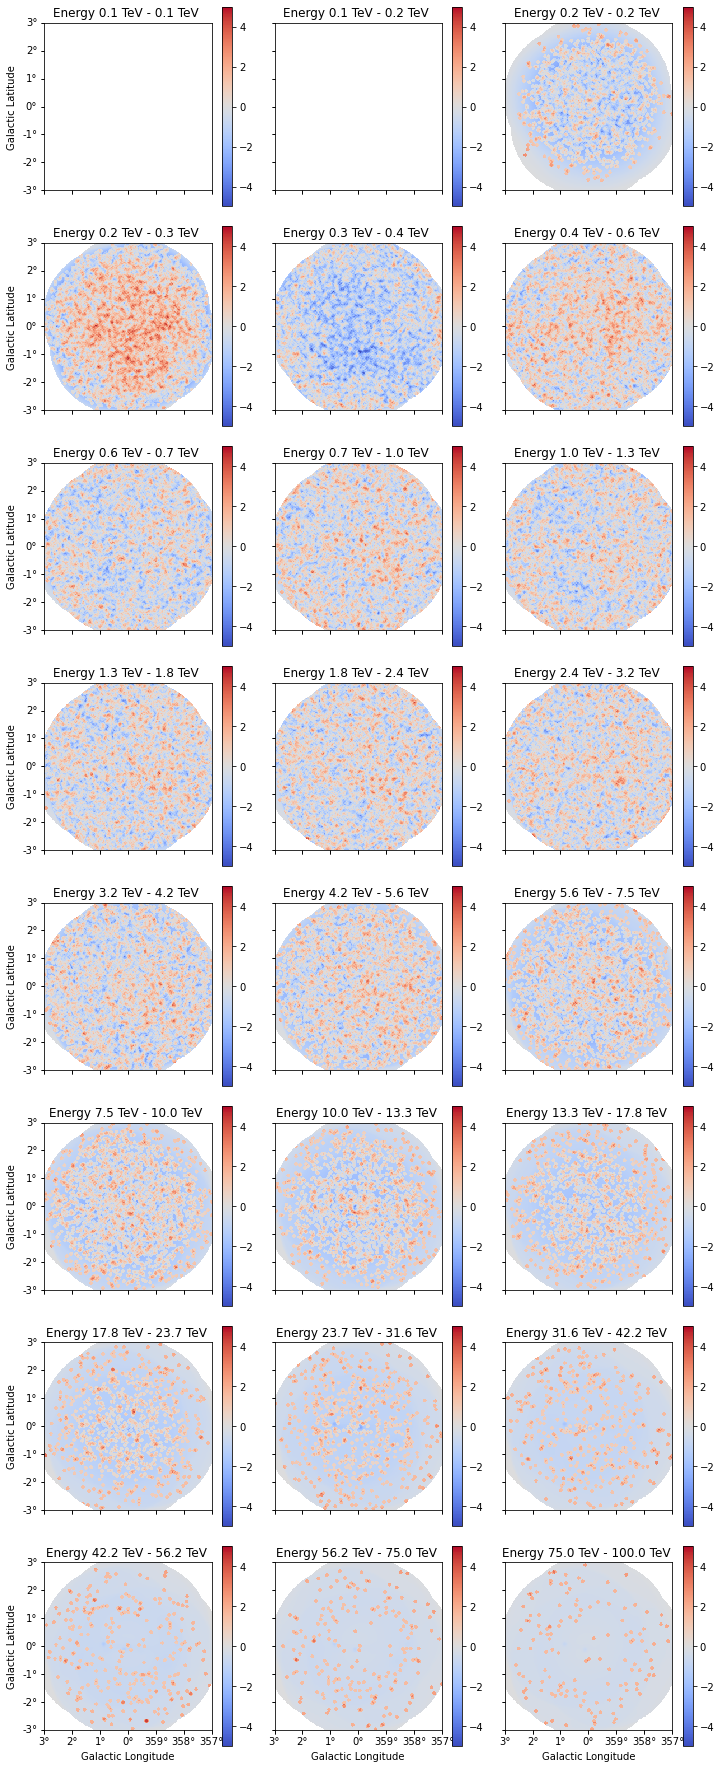

In [16]:
estimator = ExcessMapEstimator(
    correlation_radius=f"{corr} deg",
    energy_edges=dataset_N.counts.geom.axes['energy'].edges)
result = estimator.run(dataset_standard)
ax = result["sqrt_ts"].plot_grid(cmap="coolwarm", add_cbar=True, vmin=-5, vmax=5);

/home/woody/caph/mppi062h/software/anaconda/anaconda3/envs/gammapy-0.19/lib/python3.9/site-packages/astropy/visualization/wcsaxes/core.py:211: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  return super().imshow(X, *args, origin=origin, **kwargs)


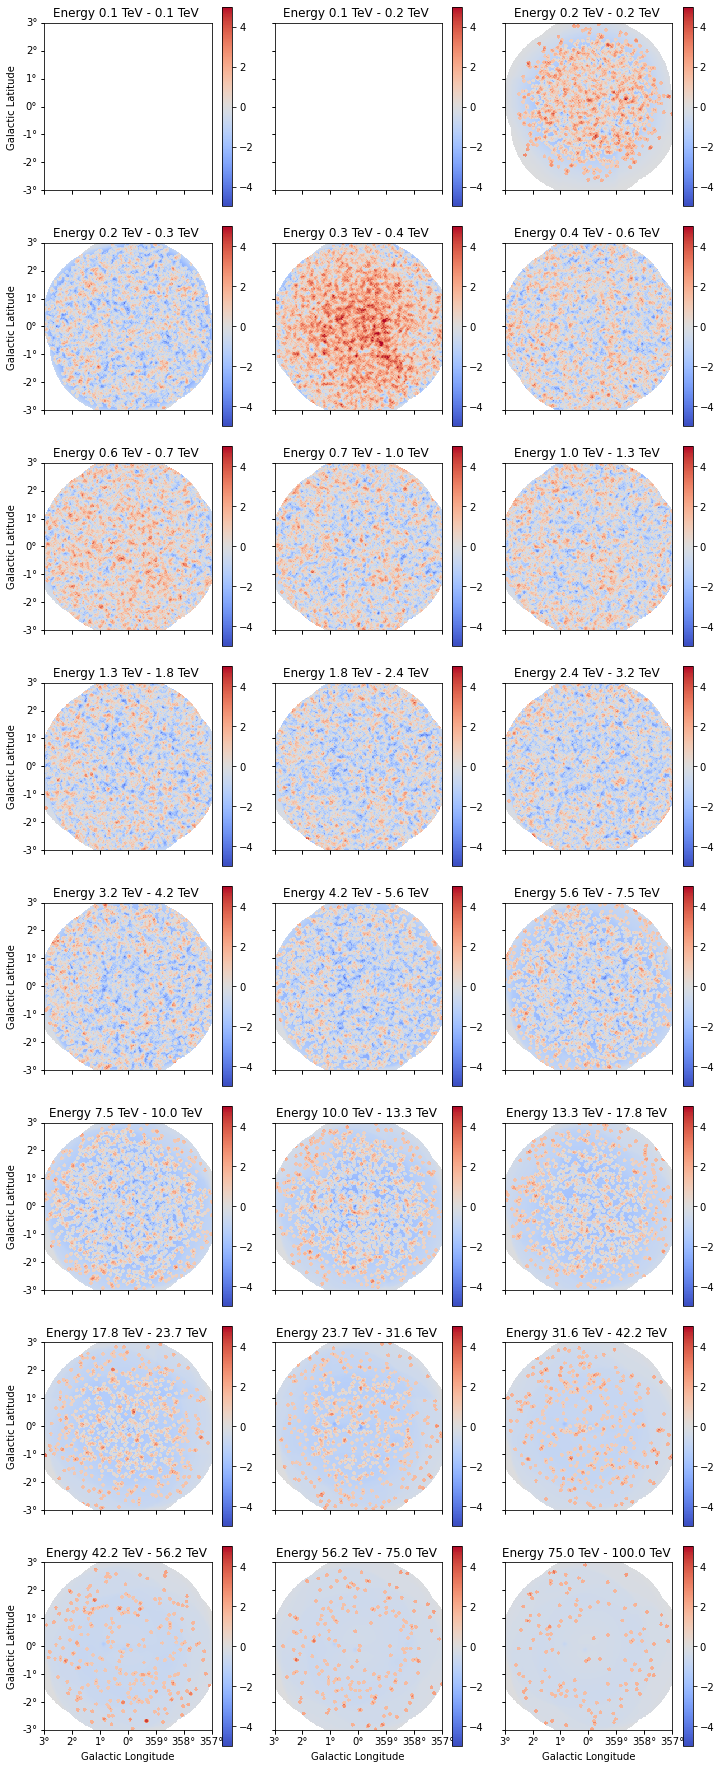

In [17]:
estimator = ExcessMapEstimator(
    correlation_radius=f"{corr} deg",
    energy_edges=dataset_N.counts.geom.axes['energy'].edges)
result = estimator.run(new_dataset)
########## full FoV
ax = result["sqrt_ts"].plot_grid(cmap="coolwarm", add_cbar=True, vmin=-5, vmax=5);

/home/woody/caph/mppi062h/software/anaconda/anaconda3/envs/gammapy-0.19/lib/python3.9/site-packages/astropy/visualization/wcsaxes/core.py:211: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  return super().imshow(X, *args, origin=origin, **kwargs)


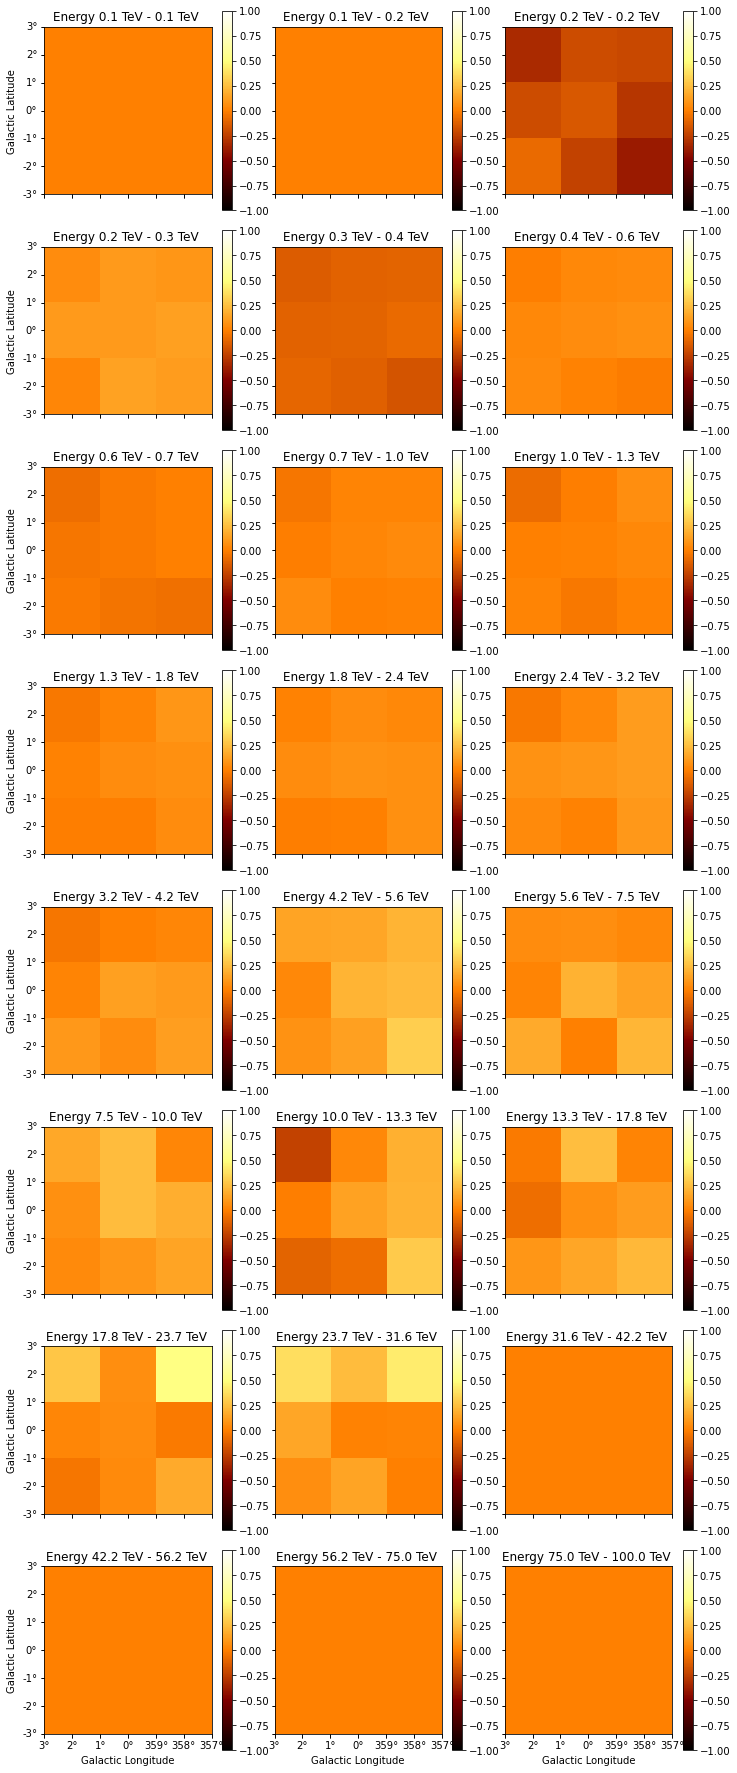

In [18]:
dataset_N.N_map().plot_grid(add_cbar=True, vmax=1., vmin=-1.);